# Import and Setup

Adjust cell width to view more content

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

Import general packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import datetime

Import YLXPS-related packages

In [3]:
import sys 
sys.path.insert(0, '/gpfs/loomis/project/david_moore/aj487/purity_monitor/')
import StandMonitor

# Data Read-In

In [4]:
FilePath = '/project/fas/david_moore/zl423/PurityData/StandStatus/'

In [5]:
Files = sorted(glob.glob(FilePath+'202008*'))

# Analysis

In [6]:
print(Files)

['/project/fas/david_moore/zl423/PurityData/StandStatus/20200801.h5', '/project/fas/david_moore/zl423/PurityData/StandStatus/20200802.h5', '/project/fas/david_moore/zl423/PurityData/StandStatus/20200803.h5', '/project/fas/david_moore/zl423/PurityData/StandStatus/20200804.h5', '/project/fas/david_moore/zl423/PurityData/StandStatus/20200805.h5', '/project/fas/david_moore/zl423/PurityData/StandStatus/20200806.h5', '/project/fas/david_moore/zl423/PurityData/StandStatus/20200807.h5', '/project/fas/david_moore/zl423/PurityData/StandStatus/20200808.h5', '/project/fas/david_moore/zl423/PurityData/StandStatus/20200809.h5', '/project/fas/david_moore/zl423/PurityData/StandStatus/20200810.h5', '/project/fas/david_moore/zl423/PurityData/StandStatus/20200811.h5', '/project/fas/david_moore/zl423/PurityData/StandStatus/20200812.h5', '/project/fas/david_moore/zl423/PurityData/StandStatus/20200813.h5', '/project/fas/david_moore/zl423/PurityData/StandStatus/20200814.h5', '/project/fas/david_moore/zl423/P

In [7]:
Times = []
Pressures = []
Dates = [] 
Temperatures = []

In [8]:
for ii,File in enumerate(Files): 
    print(ii,File)
    Xe = StandMonitor.monitor(File)
    key = list(Xe.File.keys())[0]
    values = np.array(Xe.File[key])

    
    Xe.Date = os.path.split(File)[1][:-3]
    Xe.RefTime, Xe.DateTime = StandMonitor.GetDateFromInput(Xe.Date)
    Xe.PlotTime = 0
    Xe.GetData(values)
    tt = [(Xe.DateTime + datetime.timedelta(seconds=x)) for x in Xe.Time]
    
    Dates.append(Xe.Date)
    Pressures.append(Xe.SSCylinder1P)
    Times.append(tt)
    Temperatures.append(Xe.ColdHeadT)

0 /project/fas/david_moore/zl423/PurityData/StandStatus/20200801.h5
1 /project/fas/david_moore/zl423/PurityData/StandStatus/20200802.h5
2 /project/fas/david_moore/zl423/PurityData/StandStatus/20200803.h5
3 /project/fas/david_moore/zl423/PurityData/StandStatus/20200804.h5
4 /project/fas/david_moore/zl423/PurityData/StandStatus/20200805.h5
5 /project/fas/david_moore/zl423/PurityData/StandStatus/20200806.h5
6 /project/fas/david_moore/zl423/PurityData/StandStatus/20200807.h5
7 /project/fas/david_moore/zl423/PurityData/StandStatus/20200808.h5
8 /project/fas/david_moore/zl423/PurityData/StandStatus/20200809.h5
9 /project/fas/david_moore/zl423/PurityData/StandStatus/20200810.h5
10 /project/fas/david_moore/zl423/PurityData/StandStatus/20200811.h5
11 /project/fas/david_moore/zl423/PurityData/StandStatus/20200812.h5
12 /project/fas/david_moore/zl423/PurityData/StandStatus/20200813.h5
13 /project/fas/david_moore/zl423/PurityData/StandStatus/20200814.h5
14 /project/fas/david_moore/zl423/PurityData

In [9]:
VarP = [np.std(x) for x in Pressures]
MeanP = [np.mean(x) for x in Pressures]

VarT = [np.std(x) for x in Temperatures]
MeanT = [np.mean(x) for x in Temperatures]

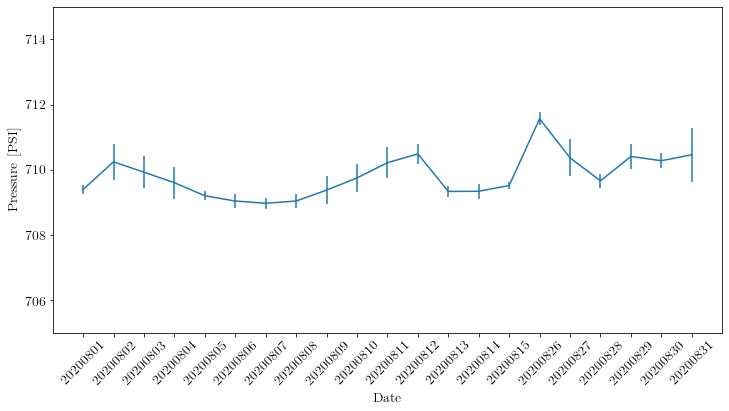

In [10]:
fig = plt.figure(figsize=(12,6))
plt.errorbar(Dates, MeanP, yerr=VarP)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Pressure [PSI]', fontsize=14)
plt.ylim(705,715)
plt.savefig('august_press.pdf', bbox_inches='tight')

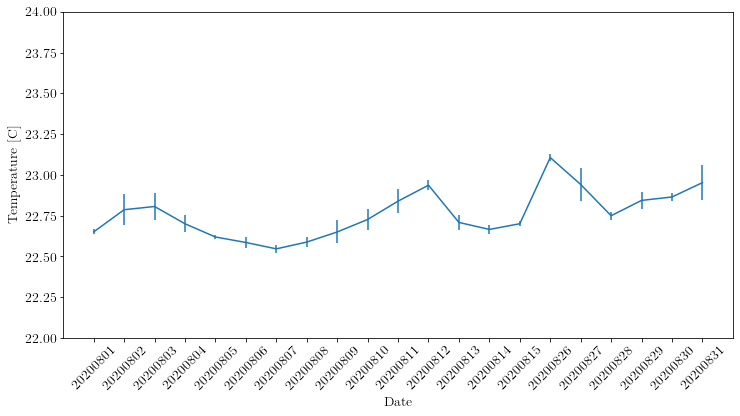

In [11]:
fig = plt.figure(figsize=(12,6))
plt.errorbar(Dates, MeanT, yerr=VarT)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature [C]', fontsize=14)
plt.ylim(22,24)
plt.savefig('august_temp.pdf', bbox_inches='tight')